In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data=pd.read_csv('/content/drive/MyDrive/content/mtcars.csv')
d=pd.crosstab(index=data['cyl'],columns="count",dropna=True)
print(d)

col_0  count
cyl         
4         11
6          7
8         14


In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [30]:
datasets = pd.read_csv('/content/drive/MyDrive/content/Data_for_Transformation.csv');
print("\nData :\n", datasets);

# describe()=> gives different mathematical parameters of data
print("\nData statistics:\n", datasets.describe())


Data :
     Country  Age  Salary Purchased
0    France   44   72000        No
1     Spain   27   48000       Yes
2   Germany   30   54000        No
3     Spain   38   61000        No
4   Germany   40   68000       Yes
5    France   35   58000       Yes
6     Spain   39   52000        No
7    France   48   79000       Yes
8   Germany   50   83000        No
9    France   37   67000       Yes
10    Spain   45   55000        No

Data statistics:
              Age        Salary
count  11.000000     11.000000
mean   39.363636  63363.636364
std     7.131237  11386.594989
min    27.000000  48000.000000
25%    36.000000  54500.000000
50%    39.000000  61000.000000
75%    44.500000  70000.000000
max    50.000000  83000.000000


In [8]:
": => for selecting all columns or all rows"
# ":-1" => don't include last column
x = datasets.iloc[:, :-1].values
print(x);

y = datasets.iloc[:, -1].values;
print(y);

# print column using starting column and ending column
# (x:y) => including x to excluding y
x_new = datasets.iloc[:, 1:3].values
print(x_new)

[['France' 44 72000]
 ['Spain' 27 48000]
 ['Germany' 30 54000]
 ['Spain' 38 61000]
 ['Germany' 40 68000]
 ['France' 35 58000]
 ['Spain' 39 52000]
 ['France' 48 79000]
 ['Germany' 50 83000]
 ['France' 37 67000]
 ['Spain' 45 55000]]
['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No']
[[   44 72000]
 [   27 48000]
 [   30 54000]
 [   38 61000]
 [   40 68000]
 [   35 58000]
 [   39 52000]
 [   48 79000]
 [   50 83000]
 [   37 67000]
 [   45 55000]]


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[ : ,0] = le.fit_transform(x[ : ,0])
print("\n\nInput : \n", x)



Input : 
 [[0 44 72000]
 [2 27 48000]
 [1 30 54000]
 [2 38 61000]
 [1 40 68000]
 [0 35 58000]
 [2 39 52000]
 [0 48 79000]
 [1 50 83000]
 [0 37 67000]
 [2 45 55000]]


In [26]:
# Step 4b: Use dummy variables from pandas library
# to create one column for each country

# what is axis =1????????????????????
# one shot method
# dummy = pd.get_dummies(datasets['Country'])
# print("\n\nDummy :\n",dummy)
# datasets = datasets.drop(['Country','Purchased'],axis=1)
# datasets = pd.concat([dummy,datasets],axis=1)


print("\n\nFinal Data :\n",datasets)



Final Data :
     France  Germany  Spain  Age  Salary
0        1        0      0   44   72000
1        0        0      1   27   48000
2        0        1      0   30   54000
3        0        0      1   38   61000
4        0        1      0   40   68000
5        1        0      0   35   58000
6        0        0      1   39   52000
7        1        0      0   48   79000
8        0        1      0   50   83000
9        1        0      0   37   67000
10       0        0      1   45   55000


In [32]:
from sklearn.preprocessing import OneHotEncoder

#Use One Hot Encoder from scikit learn
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the␣
# ,→object
x = onehotencoder.fit_transform(datasets.Country.values.reshape(-1,1)).toarray()
print(x)

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [34]:
dfOneHot = pd.DataFrame(x, columns = ["Country_"+str(int(i)) for i in range(datasets.shape[1]-1)])
df = pd.concat([datasets, dfOneHot], axis=1) #column
#droping the country column
df= df.drop(['Country'], axis=1)
#printing to verify
print(df.head())

   Age  Salary Purchased  Country_0  Country_1  Country_2
0   44   72000        No        1.0        0.0        0.0
1   27   48000       Yes        0.0        0.0        1.0
2   30   54000        No        0.0        1.0        0.0
3   38   61000        No        0.0        0.0        1.0
4   40   68000       Yes        0.0        1.0        0.0


handling missing values

In [44]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
# Step 2: Load Data
datasets = pd.read_csv('/content/drive/MyDrive/content/Data_for_Missing_Values.csv')
print("\nData :\n",datasets)
print("\nData statistics\n",datasets.describe())


Data :
     Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
4       NaN   NaN      NaN       NaN
5   Germany  40.0      NaN       Yes
6    France  35.0  58000.0       Yes
7     Spain   NaN  52000.0        No
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11    Spain  45.0  55000.0        No

Data statistics
              Age        Salary
count  10.000000     10.000000
mean   39.400000  62900.000000
std     7.515909  11892.574714
min    27.000000  48000.000000
25%    35.500000  54250.000000
50%    39.000000  59500.000000
75%    44.750000  70750.000000
max    50.000000  83000.000000


In [37]:
# Step 3: Seprate Input and Output attributes
# All rows, all columns except last
X = datasets.iloc[:, :-1].values
# Only last column
Y = datasets.iloc[:, -1].values
print("\n\nInput : \n", X)
print("\n\nOutput: \n", Y)



Input : 
 [['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 [nan nan nan]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]
 ['Spain' 45.0 55000.0]]


Output: 
 ['No' 'Yes' 'No' 'No' nan 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No']


In [40]:
# Step 4: Find the missing values and handle it in either way
# 4a. Removing the row with all null values
# datasets.dropna(axis=0,how='all',inplace=True)
print("\nNew Data :",datasets)

#4b. Removing the row with any one null values
datasets.dropna(axis=0,how='any',inplace=True)
print("\nNew Data :",datasets)


New Data :     Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
6    France  35.0  58000.0       Yes
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11    Spain  45.0  55000.0        No

New Data :     Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
6    France  35.0  58000.0       Yes
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11    Spain  45.0  55000.0        No


In [48]:
updated_df = datasets;

# ???????????????what is the following line doing????????????
# missing values filled with the mean
updated_df['Age']=updated_df['Age'].fillna(updated_df['Age'].mean())
updated_df.info()
print(datasets)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    11 non-null     object 
 1   Age        12 non-null     float64
 2   Salary     12 non-null     float64
 3   Purchased  11 non-null     object 
dtypes: float64(2), object(2)
memory usage: 512.0+ bytes
    Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
4       NaN  39.4  62900.0       NaN
5   Germany  40.0  62900.0       Yes
6    France  35.0  58000.0       Yes
7     Spain  39.4  52000.0        No
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11    Spain  45.0  55000.0        No


In [49]:
updated_df = datasets;
updated_df['Salary']=updated_df['Salary'].fillna(updated_df['Salary'].mean())
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    11 non-null     object 
 1   Age        12 non-null     float64
 2   Salary     12 non-null     float64
 3   Purchased  11 non-null     object 
dtypes: float64(2), object(2)
memory usage: 512.0+ bytes


In [51]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
# Step 2: Load Data
datasets = pd.read_csv('/content/drive/MyDrive/content/Data_for_Missing_Values.csv')
print("\nData :\n",datasets)
print("\nData statistics\n",datasets.describe())


Data :
     Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
4       NaN   NaN      NaN       NaN
5   Germany  40.0      NaN       Yes
6    France  35.0  58000.0       Yes
7     Spain   NaN  52000.0        No
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11    Spain  45.0  55000.0        No

Data statistics
              Age        Salary
count  10.000000     10.000000
mean   39.400000  62900.000000
std     7.515909  11892.574714
min    27.000000  48000.000000
25%    35.500000  54250.000000
50%    39.000000  59500.000000
75%    44.750000  70750.000000
max    50.000000  83000.000000


In [52]:
# 4b. Imputation (Replacing null values with mean value of that attribute)
# All rows, all columns except last
new_X = datasets.iloc[:, :-1].values
# Only last column
new_Y = datasets.iloc[:, -1].values
updated_df['Age'].fillna(updated_df['Age'].mean())
# Using Imputer function to replace NaN values with mean of that parameter value

16

imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")
# Fitting the data, function learns the stats
imputer = imputer.fit(new_X[:, 1:3])
# fit_transform() will execute those stats on the input ie. X[:, 1:3]
new_X[:, 1:3] = imputer.transform(new_X[:, 1:3])
# filling the missing value with mean
print("\n\nNew Input with Mean Value for NaN : \n\n", new_X)



New Input with Mean Value for NaN : 

 [['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 [nan 39.4 62900.0]
 ['Germany' 40.0 62900.0]
 ['France' 35.0 58000.0]
 ['Spain' 39.4 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]
 ['Spain' 45.0 55000.0]]


Correlation => parameter which are depends on another parameter

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/content/Data_for_Correlation.csv')
data.head()
# print(data)

,X1,X2,X3,X4,Y
0,1,1,4,-2,1
1,2,4,5,-4,1
2,3,9,6,3,0
3,4,16,7,4,0
4,5,25,8,25,1


In [58]:
## Selecting features based on correlation Generating the correlation matrix

corr = data.corr()
corr.head()

,X1,X2,X3,X4,Y
X1,1.000000,0.972714,1.000000,0.263266,-0.017719
X2,0.972714,1.000000,0.972714,0.163575,0.074688
X3,1.000000,0.972714,1.000000,0.263266,-0.017719
X4,0.263266,0.163575,0.263266,1.000000,-0.002424
Y,-0.017719,0.074688,-0.017719,-0.002424,1.000000


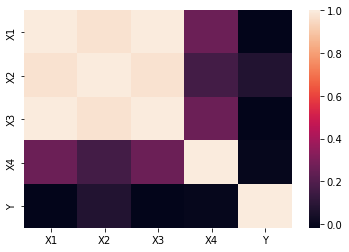

In [59]:
sns.heatmap(corr)

In [62]:
# what this function is doing?

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
  for j in range(i+1, corr.shape[0]):
    if corr.iloc[i,j] >= 0.9:
      if columns[j]:
        columns[j] = False
selected_columns = data.columns[columns]
selected_columns.shape
data = data[selected_columns]
print(data)

    X1   X4  Y
0    1   -2  1
1    2   -4  1
2    3    3  0
3    4    4  0
4    5   25  1
5    6   76  0
6    7   34  1
7    8  346  0
8    9   67  0
9   10    3  0
10  11  355  1
11  12   88  1
12  13    2  0
13  14    1  1
